# **HELOC Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

heloc_ds_path = '../../datasets/HELOC/heloc_dataset_v1.csv'
heloc_prep_ds_path = '../../datasets/preprocessed/heloc/'

(CVXPY) May 30 05:03:36 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 30 05:03:36 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(heloc_prep_ds_path)

In [3]:
data = utilities.read_csv(heloc_ds_path, dtype={'RiskPerformance': 'category',
                                                'ExternalRiskEstimate': 'int64',
                                                'MSinceOldestTradeOpen': 'int64',
                                                'MSinceMostRecentTradeOpen':'int64',
                                                'AverageMInFile':'int64',
                                                'NumSatisfactoryTrades':'int64',
                                                'NumTrades60Ever2DerogPubRec':'int64',
                                                'NumTrades90Ever2DerogPubRec':'int64',
                                                'PercentTradesNeverDelq':'int64',
                                                'MSinceMostRecentDelq':'int64',
                                                'MaxDelq2PublicRecLast12M':'int64',
                                                'MaxDelqEver':'int64',
                                                'NumTotalTrades':'int64',
                                                'NumTradesOpeninLast12M':'int64',
                                                'PercentInstallTrades':'int64',
                                                'MSinceMostRecentInqexcl7days':'int64',
                                                'NumInqLast6M':'int64',
                                                'NumInqLast6Mexcl7days':'int64',
                                                'NetFractionRevolvingBurden':'int64',
                                                'NetFractionInstallBurden':'int64',
                                                'NumRevolvingTradesWBalance':'int64',
                                                'NumInstallTradesWBalance':'int64',
                                                'NumBank2NatlTradesWHighUtilization':'int64',
                                                'PercentTradesWBalance':'int64'})
data

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,6,6,21,5,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,6,6,12,0,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,6,8,18,1,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,6,2,45,0,20,6,0,0,19,-8,4,1,0,38


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   RiskPerformance                     10459 non-null  category
 1   ExternalRiskEstimate                10459 non-null  int64   
 2   MSinceOldestTradeOpen               10459 non-null  int64   
 3   MSinceMostRecentTradeOpen           10459 non-null  int64   
 4   AverageMInFile                      10459 non-null  int64   
 5   NumSatisfactoryTrades               10459 non-null  int64   
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64   
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64   
 8   PercentTradesNeverDelq              10459 non-null  int64   
 9   MSinceMostRecentDelq                10459 non-null  int64   
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64   
 11  MaxDelqEver                 

#### Fix target feature.

In [5]:
data['defaulted'] = data['RiskPerformance'] == 'Bad'
data.drop(['RiskPerformance'], axis=1, inplace=True)

#### Plot features data types.

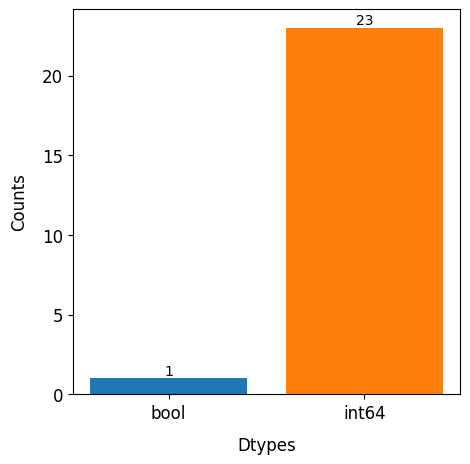

In [6]:
plotting.plot_dtypes_hist(data, save_path=heloc_prep_ds_path)

#### Data cleaning.

In [7]:
before_data_cleaning_count = len(data)

#### Plot class distribution.

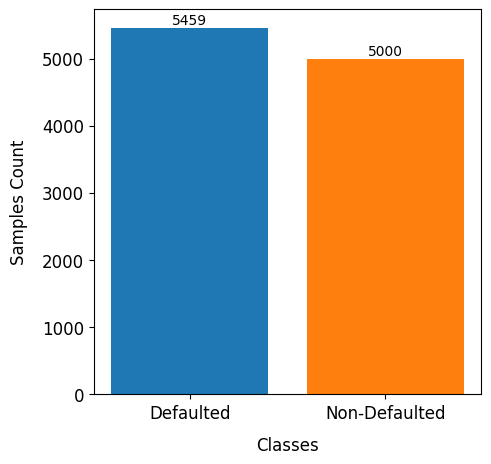

In [8]:
plotting.plot_class_distr_hist(data, save_path=heloc_prep_ds_path)

#### Plot missing values histogram.

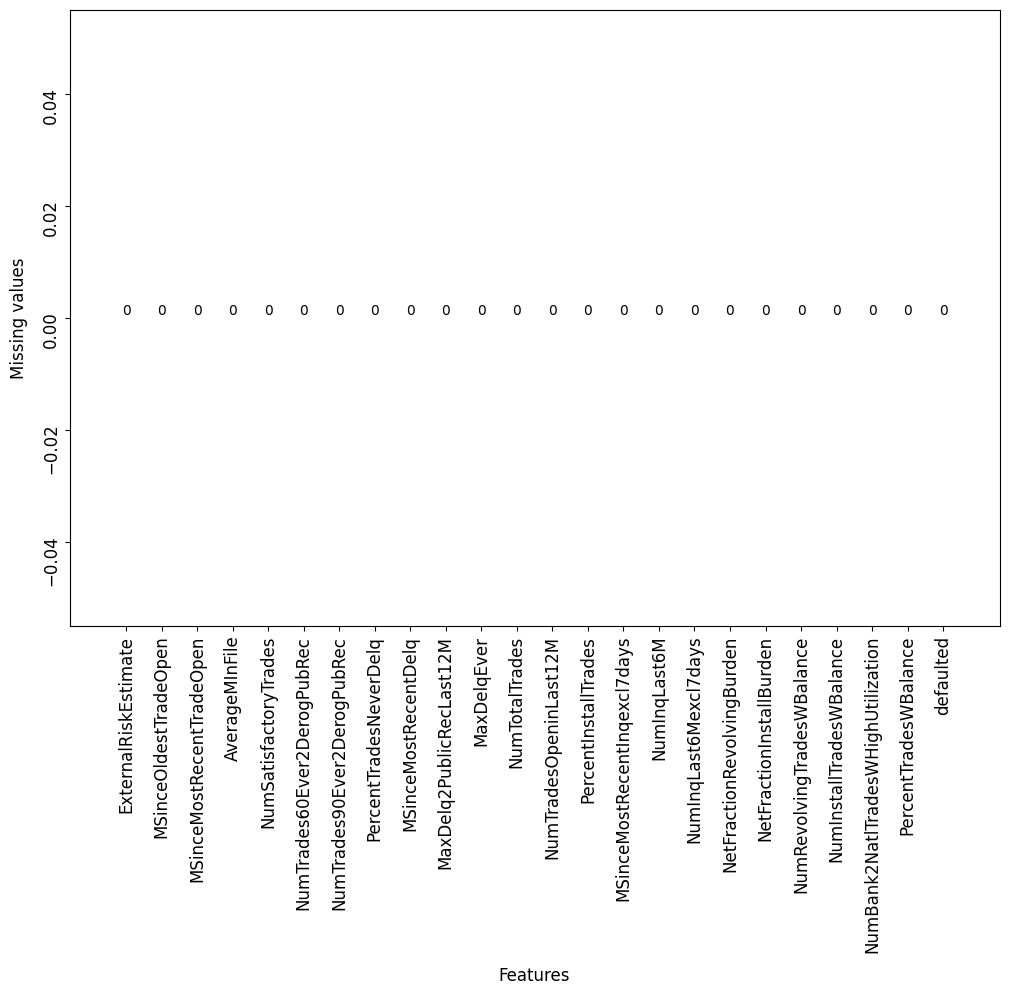

In [9]:
plotting.plot_missing_hist(data, figsize=(12,8), save_path=heloc_prep_ds_path)

#### Apply optimal binninf and WoE.

In [10]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=heloc_prep_ds_path,
                                                     verbose=True)



Processing feature: ExternalRiskEstimate.
2023-05-30 17:03:36,817 | INFO : Optimal binning started.
2023-05-30 17:03:36,818 | INFO : Options: check parameters.
2023-05-30 17:03:36,818 | INFO : Pre-processing started.
2023-05-30 17:03:36,818 | INFO : Pre-processing: number of samples: 10459
2023-05-30 17:03:36,819 | INFO : Pre-processing: number of clean samples: 9856
2023-05-30 17:03:36,819 | INFO : Pre-processing: number of missing samples: 0
2023-05-30 17:03:36,820 | INFO : Pre-processing: number of special samples: 0
2023-05-30 17:03:36,820 | INFO : Pre-processing: number of outlier samples: 603
2023-05-30 17:03:36,820 | INFO : Pre-processing terminated. Time: 0.0007s
2023-05-30 17:03:36,820 | INFO : Pre-binning started.
2023-05-30 17:03:36,823 | INFO : Pre-binning: number of prebins: 12
2023-05-30 17:03:36,823 | INFO : Pre-binning: number of refinements: 0
2023-05-30 17:03:36,824 | INFO : Pre-binning terminated. Time: 0.0026s
2023-05-30 17:03:36,824 | INFO : Optimizer started.
20

In [11]:
data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,defaulted
0,-1.635780,-0.105517,-0.009380,0.375588,0.103409,-0.919363,-1.110223e-16,-1.035579,-0.554523,-0.885367,-0.551511,0.084184,0.080742,-0.091064,-0.336167,0.254828,0.241289,0.030324,0.197795,-0.638996,0.103930,-0.408767,-0.077777,True
1,-1.258004,-0.617959,0.076549,-0.751612,-0.562412,-0.919363,-1.110223e-16,0.443731,0.512625,-0.885367,0.491763,-0.359095,0.138244,-0.667903,-0.336167,0.254828,0.241289,0.452781,0.197795,0.193711,0.103930,0.449148,1.089314,True
2,-0.771690,-0.617959,-0.009380,-0.751612,-0.320794,0.222258,-1.110223e-16,0.443731,0.512625,0.561838,0.491763,-0.213079,-0.186681,-0.091064,-0.336167,-0.513820,-0.517008,-0.540913,-0.092510,0.027876,0.060972,-0.408767,-0.517368,True
3,-0.771690,-0.004621,-0.152246,0.050034,0.258036,-0.522528,-1.110223e-16,-0.261931,-0.554523,-0.091183,-0.314303,0.239853,-0.136844,-0.372376,-0.336167,-0.513820,-0.517008,-0.911452,-0.194849,-0.347184,-0.246750,-0.716199,-0.854124,True
4,1.199467,0.491007,0.243847,0.679387,-0.140608,0.222258,-1.110223e-16,0.443731,0.512625,0.561838,0.491763,-0.167236,0.138244,0.178207,-0.336167,-0.019561,-0.031276,-0.540913,-0.271985,0.175938,0.103930,0.449148,-0.275188,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,-0.001158,-0.361646,-0.009380,-0.350316,0.103409,0.222258,-1.110223e-16,-0.261931,-0.554523,-0.091183,-0.314303,0.057213,-0.249008,0.368503,0.816998,0.254828,0.241289,0.101949,0.197795,-0.172264,0.060972,0.449148,-0.970716,False
10455,-0.869426,-0.105517,0.243847,-0.060926,-0.320794,0.222258,-1.110223e-16,-0.261931,-0.554523,-0.091183,-0.314303,-0.167236,0.138244,0.060029,0.260873,-0.019561,-0.031276,-1.501447,0.055253,0.193711,0.060972,-0.408767,-0.275188,True
10456,0.275008,-0.361646,-0.009380,-0.176209,0.103409,-0.522528,-1.110223e-16,0.443731,0.512625,-0.091183,0.491763,0.057213,0.080742,0.117033,0.637970,-0.513820,-0.517008,1.054903,0.197795,-0.172264,0.103930,0.449148,0.339022,True
10457,-0.001158,0.260225,0.076549,0.571052,0.443434,-0.919363,-1.110223e-16,0.202796,-0.554523,-0.091183,-0.764073,0.380977,0.138244,0.249169,0.637970,0.254828,0.241289,0.382003,0.197795,0.027876,0.103930,0.449148,0.734894,True


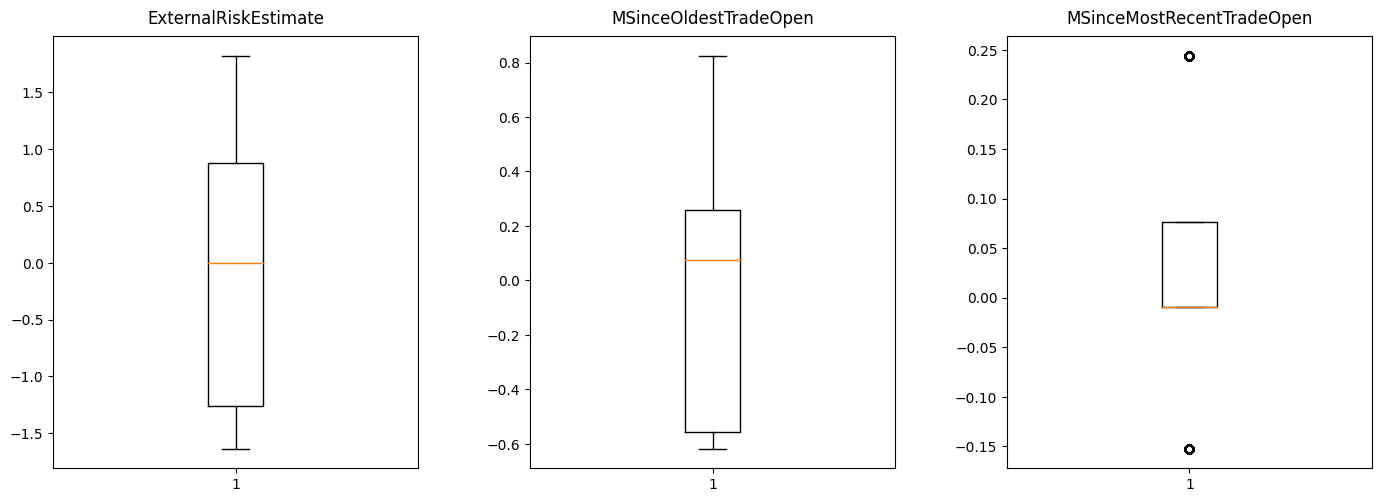

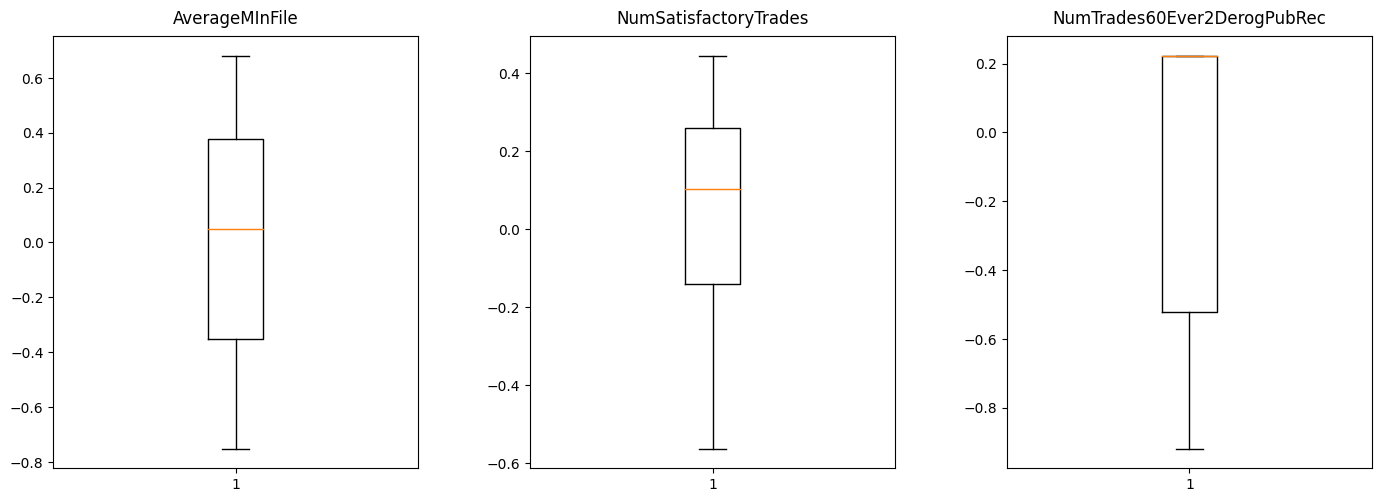

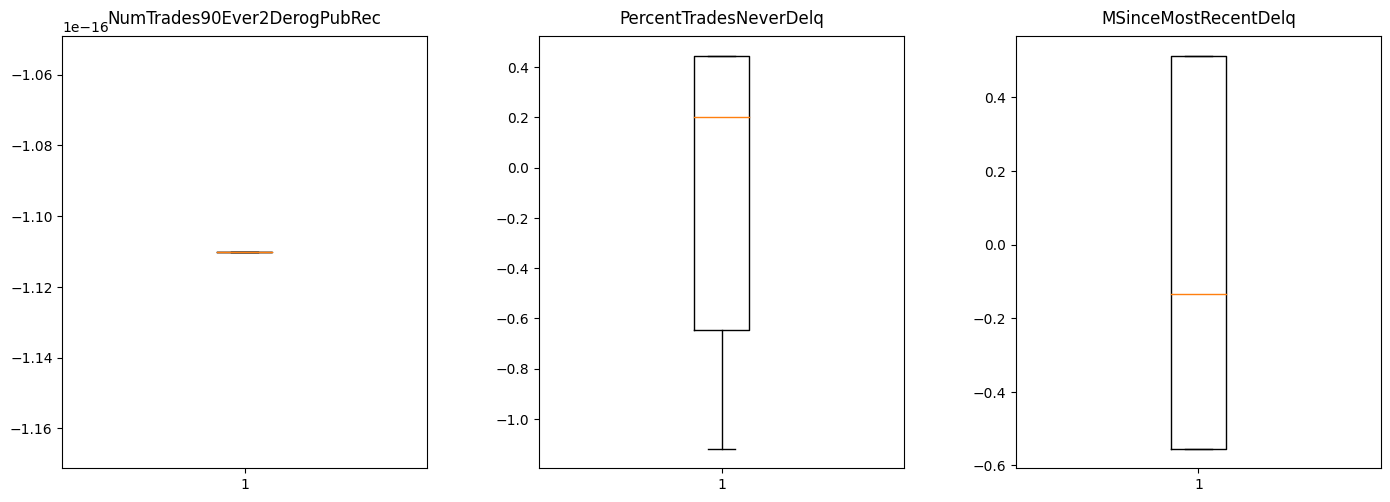

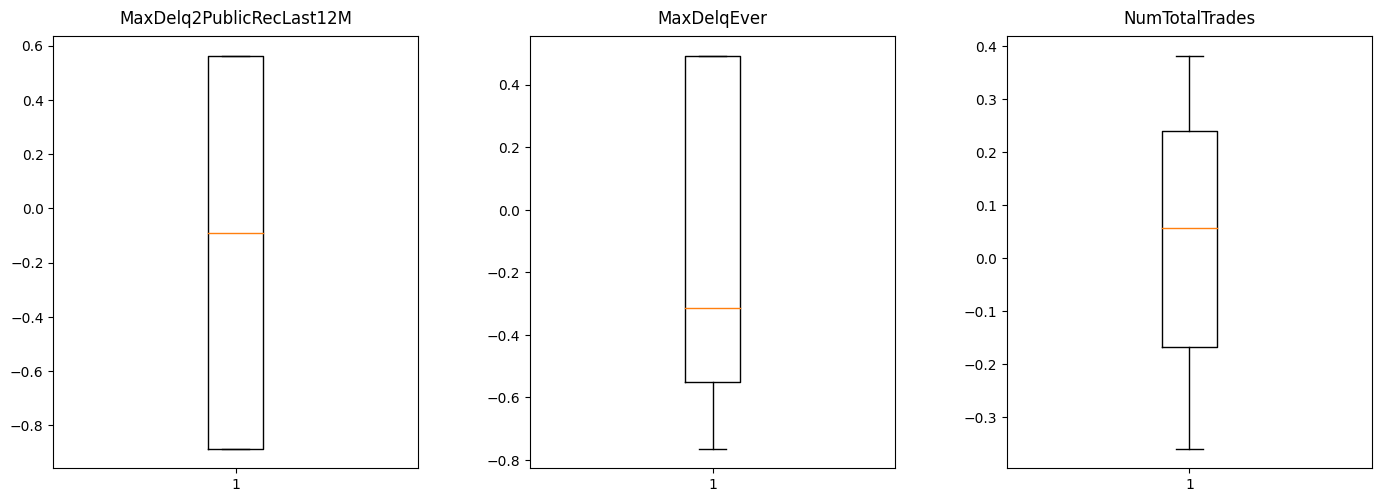

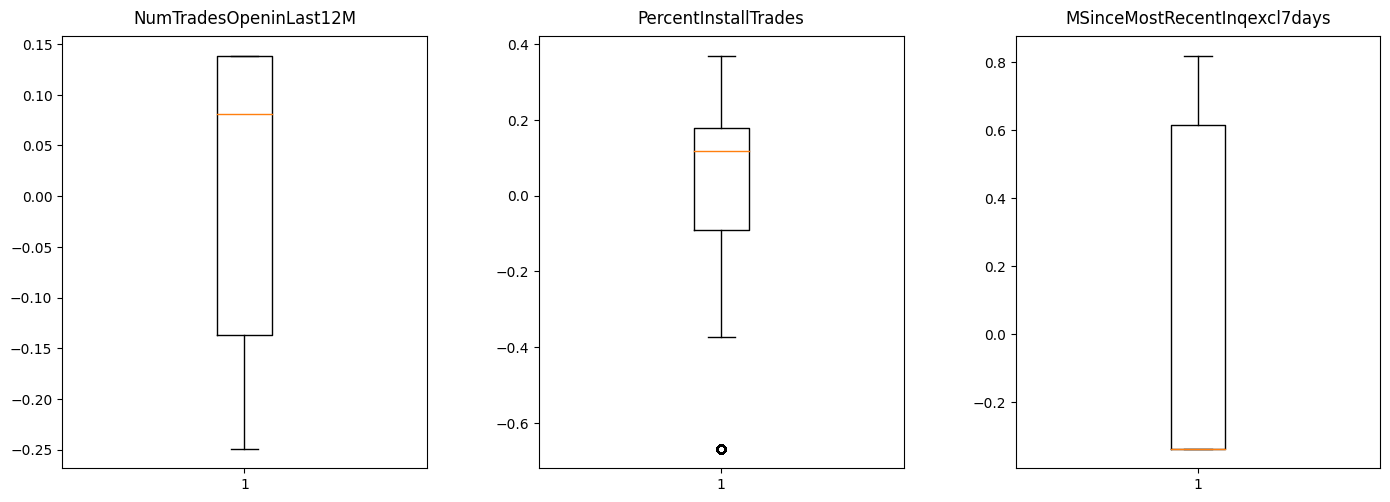

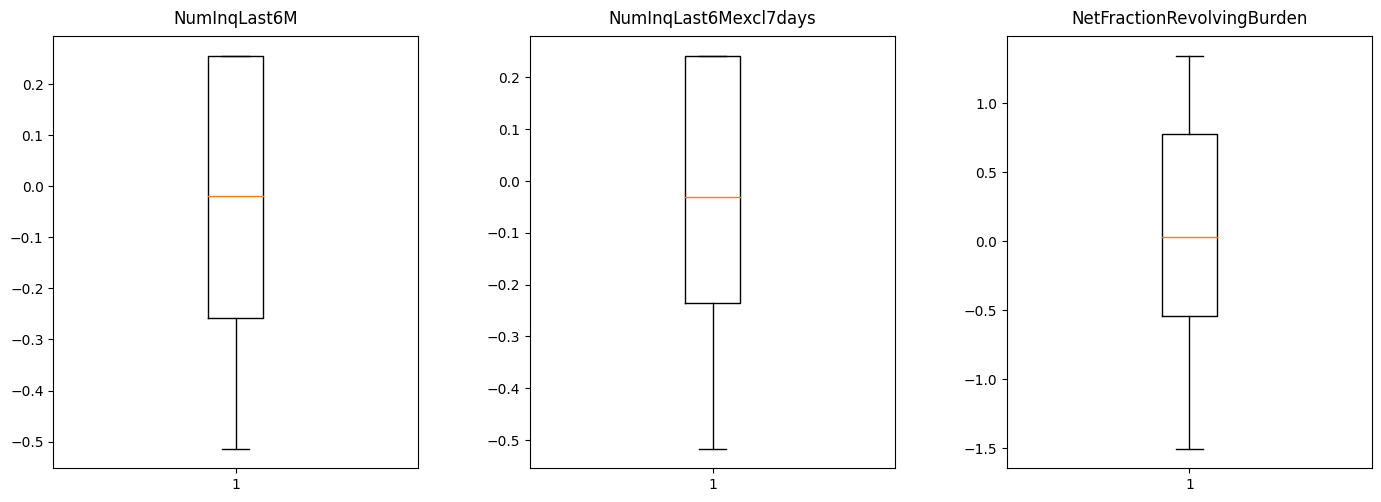

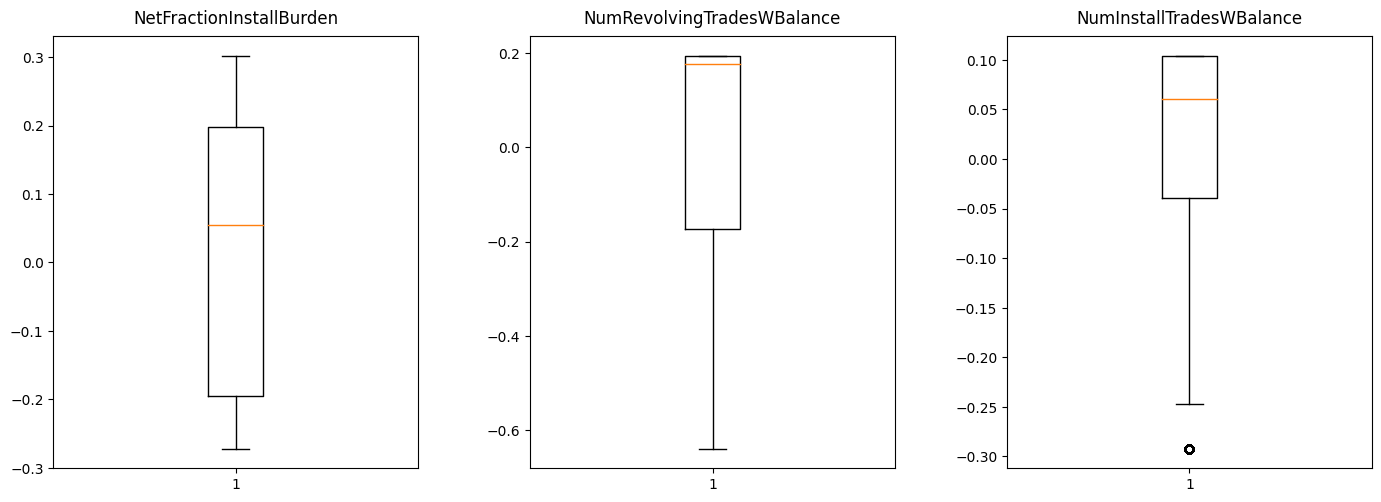

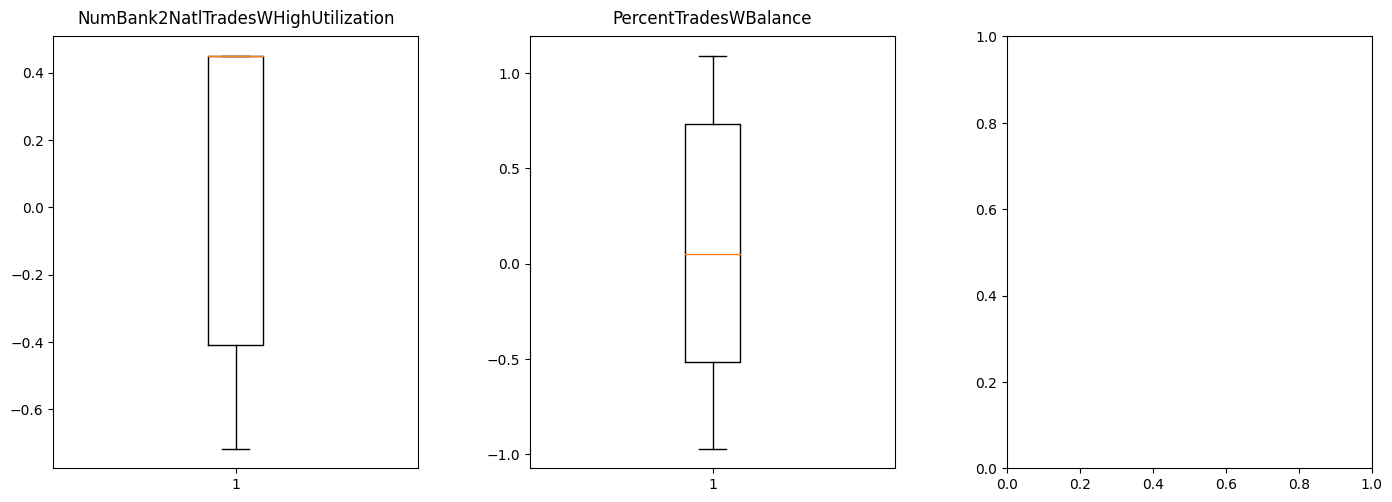

In [12]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=heloc_prep_ds_path)

In [13]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=heloc_prep_ds_path)

#### Plot samples count before and after Data cleaning.

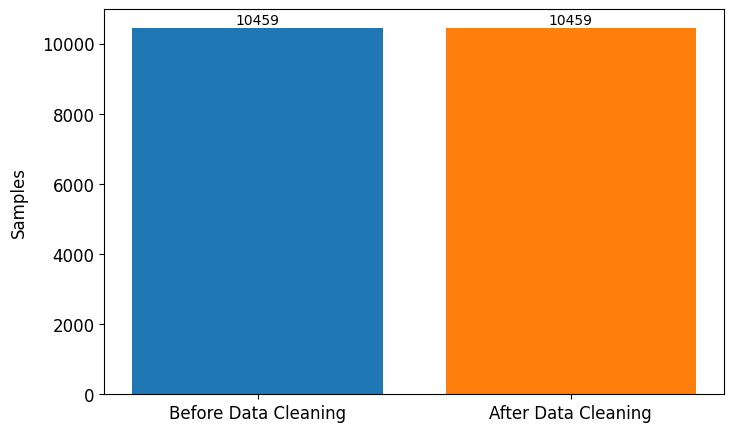

In [14]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=heloc_prep_ds_path + 'before_after.pdf')

#### Features IV scores

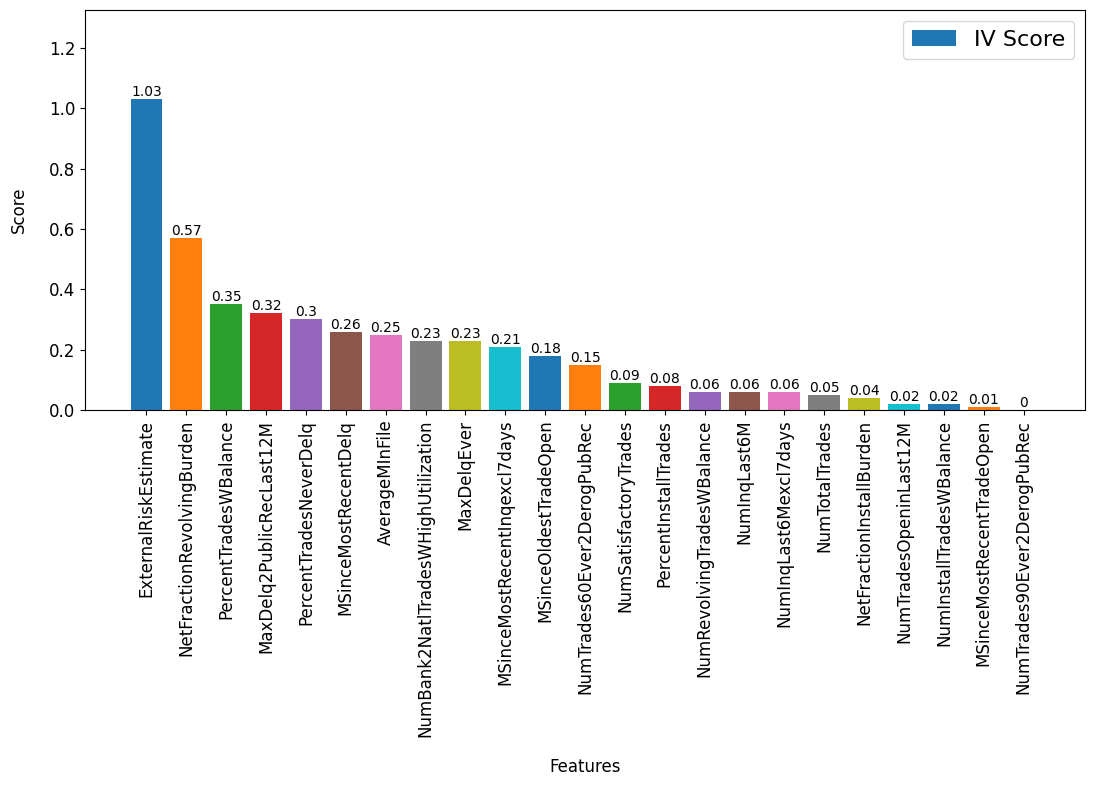

In [15]:
plotting.plot_features_scores(features_scores, '')

#### Drop features with lowest IV scores.

In [16]:
to_be_dropped = ['NumTrades90Ever2DerogPubRec']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Features correlation

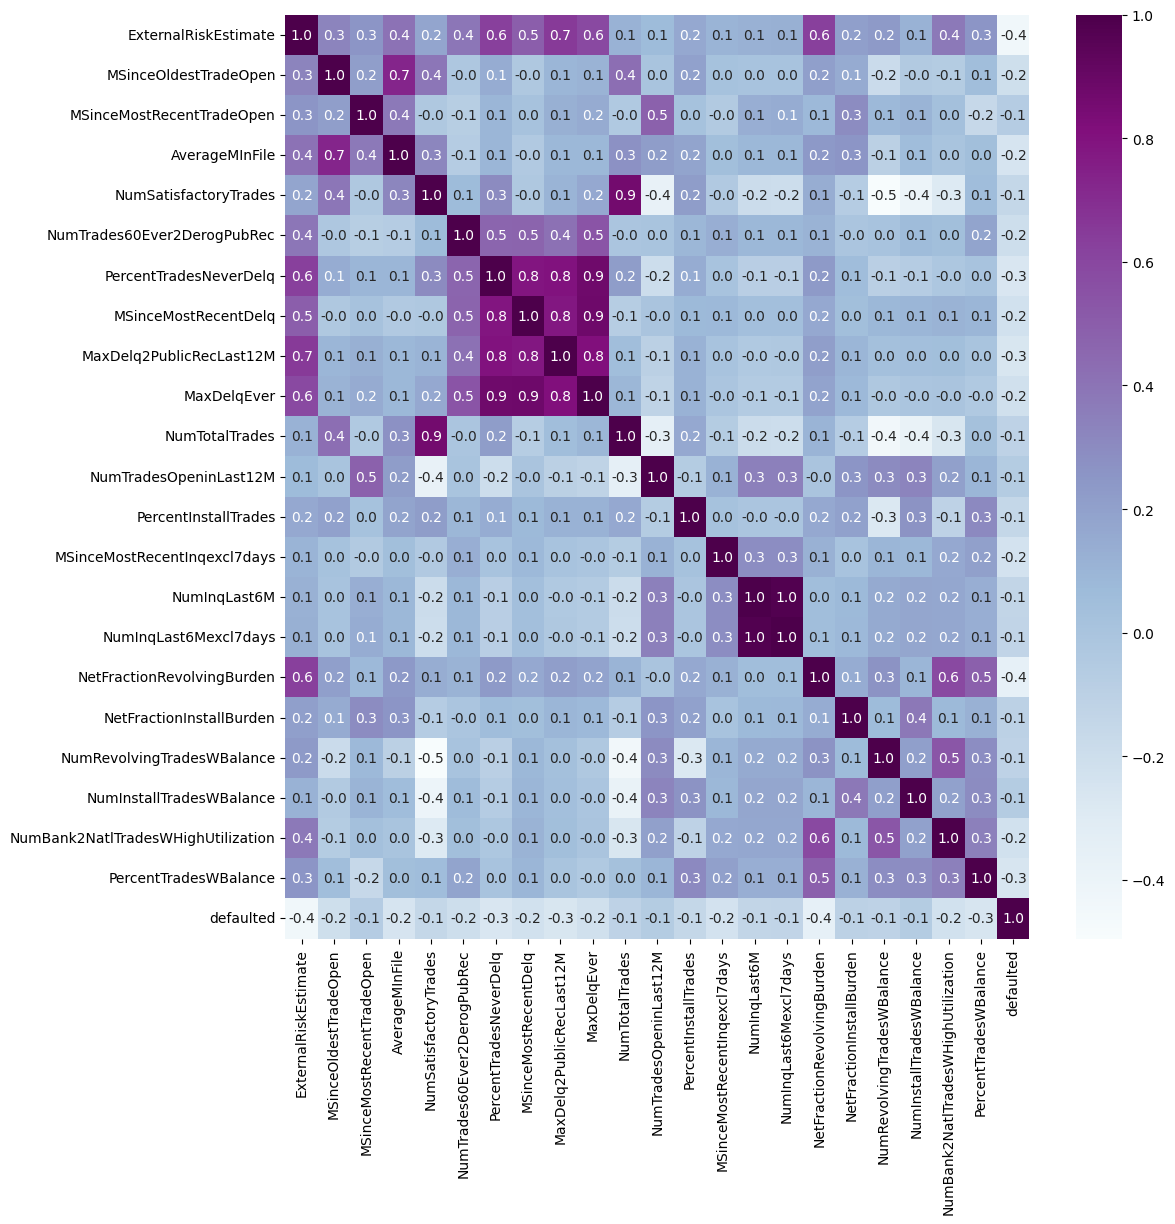

In [17]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=heloc_prep_ds_path, dpi=100)

#### Drop redundant features with lowest IV scores.

In [18]:
to_be_dropped = ['PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelqEver', 'NumInqLast6Mexcl7days']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Save preprocessed dataset.

In [19]:
data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,MaxDelq2PublicRecLast12M,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,defaulted
0,-1.635780,-0.105517,-0.009380,0.375588,0.103409,-0.919363,-0.885367,0.084184,0.080742,-0.091064,-0.336167,0.254828,0.030324,0.197795,-0.638996,0.103930,-0.408767,-0.077777,True
1,-1.258004,-0.617959,0.076549,-0.751612,-0.562412,-0.919363,-0.885367,-0.359095,0.138244,-0.667903,-0.336167,0.254828,0.452781,0.197795,0.193711,0.103930,0.449148,1.089314,True
2,-0.771690,-0.617959,-0.009380,-0.751612,-0.320794,0.222258,0.561838,-0.213079,-0.186681,-0.091064,-0.336167,-0.513820,-0.540913,-0.092510,0.027876,0.060972,-0.408767,-0.517368,True
3,-0.771690,-0.004621,-0.152246,0.050034,0.258036,-0.522528,-0.091183,0.239853,-0.136844,-0.372376,-0.336167,-0.513820,-0.911452,-0.194849,-0.347184,-0.246750,-0.716199,-0.854124,True
4,1.199467,0.491007,0.243847,0.679387,-0.140608,0.222258,0.561838,-0.167236,0.138244,0.178207,-0.336167,-0.019561,-0.540913,-0.271985,0.175938,0.103930,0.449148,-0.275188,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,-0.001158,-0.361646,-0.009380,-0.350316,0.103409,0.222258,-0.091183,0.057213,-0.249008,0.368503,0.816998,0.254828,0.101949,0.197795,-0.172264,0.060972,0.449148,-0.970716,False
10455,-0.869426,-0.105517,0.243847,-0.060926,-0.320794,0.222258,-0.091183,-0.167236,0.138244,0.060029,0.260873,-0.019561,-1.501447,0.055253,0.193711,0.060972,-0.408767,-0.275188,True
10456,0.275008,-0.361646,-0.009380,-0.176209,0.103409,-0.522528,-0.091183,0.057213,0.080742,0.117033,0.637970,-0.513820,1.054903,0.197795,-0.172264,0.103930,0.449148,0.339022,True
10457,-0.001158,0.260225,0.076549,0.571052,0.443434,-0.919363,-0.091183,0.380977,0.138244,0.249169,0.637970,0.254828,0.382003,0.197795,0.027876,0.103930,0.449148,0.734894,True


In [20]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ExternalRiskEstimate                10459 non-null  float64
 1   MSinceOldestTradeOpen               10459 non-null  float64
 2   MSinceMostRecentTradeOpen           10459 non-null  float64
 3   AverageMInFile                      10459 non-null  float64
 4   NumSatisfactoryTrades               10459 non-null  float64
 5   NumTrades60Ever2DerogPubRec         10459 non-null  float64
 6   MaxDelq2PublicRecLast12M            10459 non-null  float64
 7   NumTotalTrades                      10459 non-null  float64
 8   NumTradesOpeninLast12M              10459 non-null  float64
 9   PercentInstallTrades                10459 non-null  float64
 10  MSinceMostRecentInqexcl7days        10459 non-null  float64
 11  NumInqLast6M                        10459

**EMP-$p_1$:**

In [21]:
preprocessing.compute_p1(data)

0.5219428243617936

**EMP-$p_0$:**

In [22]:
preprocessing.compute_p0(data)

0.4780571756382063

In [23]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=heloc_prep_ds_path)

Train split size: 8367
Train split p1: 0.5219313971554919
Train split p0: 0.4780686028445082

Test split size: 2092
Test split p1: 0.5219885277246654
Test split p0: 0.4780114722753346
